## Review (2)

Thank you for update. Things were fixed.

---

## Review

Hi Raymond. This is Soslan and our third project together. As always I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
  If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work so I can accept it then the color will be red
</div>

Your project is of good quality. Your code is correct but as I see you don't interpret one of the hypotheses testings correctly. Actually you need to change one word and then I can accept your project. It is always a good idea to write explicitly null and alternate hypotheses.

---

# Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
from scipy import stats as st

game_data = pd.read_csv('/datasets/games.csv')

#Open and view data
print(game_data.info())
game_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


# Step 2. Prepare the data

In [2]:
#Format column names to lowercase
game_data.columns = game_data.columns.str.lower()

#View changes
game_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [3]:
#Convert the data to the required types.
game_data['year_of_release'] = game_data['year_of_release'].fillna(0)
game_data['year_of_release'] = game_data['year_of_release'].astype('int')

#View changes
print(game_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


I decided to fill in the missing years with 0 since there isn't an easy way to determine the values.

In [4]:
#Check the rows with no game name given
print(game_data[game_data['name'].isnull()].head())

#Remove the rows with insufficient data
game_data = game_data.drop([659, 14244])

#Check that those rows are gone
game_data[game_data['name'].isnull()].head()

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Since the 2 rows didn't have significant data, I decided to remove them all together.

In [5]:
#Fill in the missing critic and user scores with none
game_data['critic_score'] = game_data['critic_score'].fillna(0)
game_data['user_score'] = game_data['user_score'].fillna(0)

#Check that there are no missing scores
print(game_data[game_data['critic_score'].isnull()].head())
print(game_data[game_data['user_score'].isnull()].head())

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


I think there are missing scores due to lack of people playing the game overall and thus no score was assigned.
Since there isn't an easy way to decide upon the missings scores, I decided to have 0 fill in to better analyze the data.

In [6]:
#Fill in missing ratings with an empty string
game_data['rating'] = game_data['rating'].fillna('')

#Check that there are no missing ratings
print(game_data[game_data['rating'].isnull()].head())

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


I think the data is missing here due to input error.
Since there isn't an easy way to obtain the missing ratings, I chose to fill in the missing ratings with a blank string to better analyze the rest of the data.

In [7]:
#Change tbd in user_score to be 0
game_data.loc[game_data['user_score'] == 'tbd', 'user_score'] = 0

#Change user_score into float
game_data['user_score'] = game_data['user_score'].astype(float)

#Check changes
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<div class="alert alert-success" role="alert">
Good work with missed values. You could also convert critic_score to int.</div>

I chose to replace tbd with 0 in order to better analyze the rest of the data.

In [8]:
#Calculate total sales for each game
game_data['total_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['jp_sales'] + game_data['other_sales']

#View changes
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,,0.01


# Step 3. Analyze the data

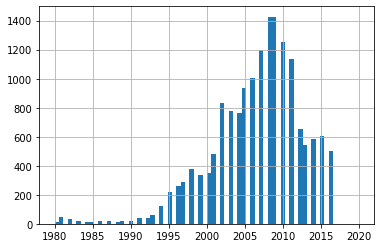

In [9]:
#Look at how many games were released in different years. Is the data for every period significant?
game_data['year_of_release'].hist(bins=70, range=(1980,2020))

<div class="alert alert-warning" role="alert">
In this case better to use barplot because histogram aggregates data by bins, not by index values. You can see the picture on the histogram but the barplot here is more informative. Also using figsize parameter makes your chart bit nicer. Compare with the next plot.</div>


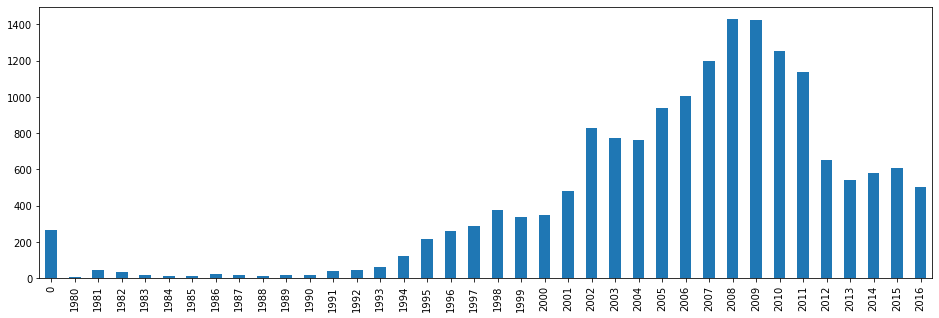

In [25]:
# reviewer's code

game_data['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(16,5))

Examining the data for game releases by year shows that there is a significant increase around 2005 - 2010.

In [26]:
#Look at how sales varied from platform to platform. 
sales_per_platform = game_data.pivot_table(index= 'platform', values= 'total_sales', aggfunc= 'sum')
print(sales_per_platform.sort_values(by='total_sales', ascending= False))

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12
PS             730.86
GBA            317.85
PS4            314.14
PSP            294.05
PC             259.52
3DS            259.00
XB             257.74
GB             255.46
NES            251.05
N64            218.68
SNES           200.04
GC             198.93
XOne           159.32
2600            96.98
WiiU            82.19
PSV             54.07
SAT             33.59
GEN             28.35
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


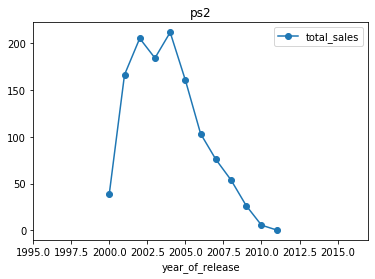

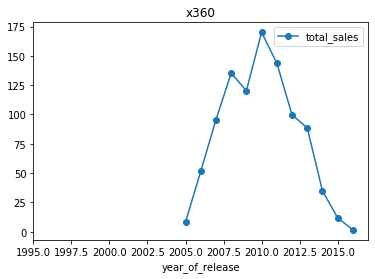

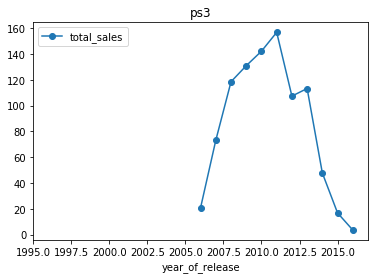

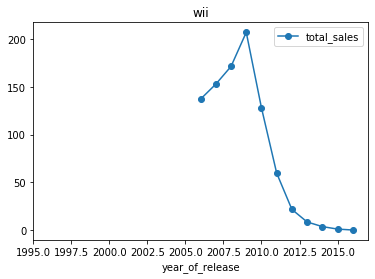

In [27]:
#Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
ps2 = game_data.query('platform == "PS2" and year_of_release > 0')
ps2.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(style= 'o-', 
                                                                                      title= 'ps2',
                                                                                     xlim= [1995, 2017])

x360 = game_data.query('platform == "X360" and year_of_release > 0')
x360.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(style= 'o-', 
                                                                                       title= 'x360',
                                                                                      xlim= [1995, 2017])
ps3 = game_data.query('platform == "PS3" and year_of_release > 0')
ps3.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(style= 'o-', 
                                                                                       title= 'ps3',
                                                                                      xlim= [1995, 2017])

wii = game_data.query('platform == "Wii" and year_of_release > 0')
wii.pivot_table(index= 'year_of_release', values= 'total_sales', aggfunc= 'sum').plot(style= 'o-', 
                                                                                       title= 'wii',
                                                                                      xlim= [1995, 2017])

<div class="alert alert-success" role="alert">
Good graphs</div>

In [28]:
#Find platforms that used to be popular but now have zero sales. 

By analyzing the data of total sales for the ps2, x360 and wii, they were popular at one point, but now have 0 sales

In [29]:
#How long does it generally take for new platforms to appear and old ones to fade?
x = game_data.pivot_table(index= ['platform', 'year_of_release'], values= 'total_sales', aggfunc= 'sum')
x = x.reset_index()
x = x.query('year_of_release > 0')
for plfm in x['platform'].unique():
    y = x.query('platform == @plfm')
    print(plfm, 'released games from', y['year_of_release'].min(),'to', y['year_of_release'].max(),
         'with a platform lifespan of', len(y['year_of_release']), 'year(s).')


2600 released games from 1980 to 1989 with a platform lifespan of 10 year(s).
3DO released games from 1994 to 1995 with a platform lifespan of 2 year(s).
3DS released games from 2011 to 2016 with a platform lifespan of 6 year(s).
DC released games from 1998 to 2008 with a platform lifespan of 7 year(s).
DS released games from 1985 to 2013 with a platform lifespan of 11 year(s).
GB released games from 1988 to 2001 with a platform lifespan of 13 year(s).
GBA released games from 2000 to 2007 with a platform lifespan of 8 year(s).
GC released games from 2001 to 2007 with a platform lifespan of 7 year(s).
GEN released games from 1990 to 1994 with a platform lifespan of 5 year(s).
GG released games from 1992 to 1992 with a platform lifespan of 1 year(s).
N64 released games from 1996 to 2002 with a platform lifespan of 7 year(s).
NES released games from 1983 to 1994 with a platform lifespan of 12 year(s).
NG released games from 1993 to 1996 with a platform lifespan of 4 year(s).
PC released g

<div class="alert alert-success" role="alert">
Great table very informative.</div>

By analysing the data of when a platform has sales of its games, a platform generally lasts about 6 years and a new platform appears every other year.

Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [30]:
#examine the game sales count for each platform past 2014
x = game_data.pivot_table(index= ['platform','year_of_release'], values= 'total_sales', aggfunc= 'count')
x = x.query('year_of_release >= 2014')
x

total_sales
platform year_of_release             
3DS      2014                      80
         2015                      86
         2016                      46
PC       2014                      47
         2015                      50
         2016                      54
PS3      2014                     108
         2015                      73
         2016                      38
PS4      2014                      75
         2015                     137
         2016                     164
PSP      2014                      10
         2015                       3
PSV      2014                     100
         2015                     110
         2016                      85
Wii      2014                       6
         2015                       4
         2016                       1
WiiU     2014                      31
         2015                      28
         2016                      14
X360     2014                      63
         2015                      35
         2016                      13
XOne     2014                      61
         2015                      80
         2016                      87

By examining the data, I have decided to only look at data with year_of_release at 2014 or more in order to have the data be relevant to forecasting into 2017. 

From looking at the trend of these platforms, PC, PS4 and XOne are increasing in sales while PSP, Wii, WiiU and X360 are noticeably dropping in sales. 

<div class="alert alert-warning" role="alert">
It looks like too small time range but it's on you.</div>

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

,total_sales
platform,
3DS,0.408868
PC,0.179139
PS3,0.311324
PS4,0.766356
PSP,0.027692
PSV,0.075932
Wii,0.460909
WiiU,0.588767
X360,0.434414


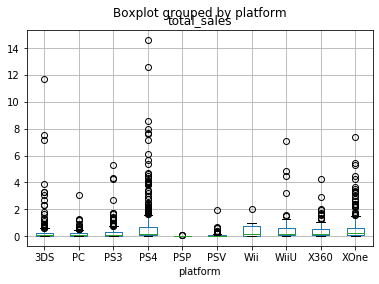

In [31]:
onward_2014 = game_data.query('year_of_release >= 2014')
onward_2014.boxplot(by='platform',column= 'total_sales')
onward_2014.pivot_table(index= 'platform', values= 'total_sales', aggfunc='mean')

After breaking down the global sales by platform, there are noticeable differences in sales, particularly PS4 and 3DS. Average sales on various platforms are generally different as well.

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

The correlation between critic score and total sales: 0.40190287811475334
The correlation between user score and total sales: -0.04318585997193634


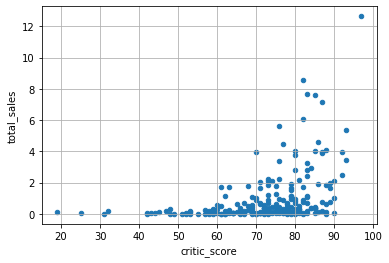

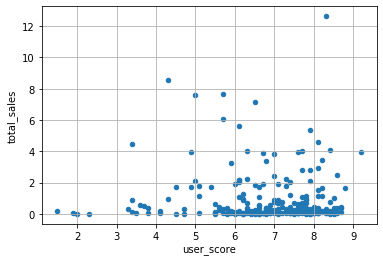

In [33]:
#Choose ps4 to analyze
ps4_analysis = onward_2014.query('platform == "PS4" and user_score > 0 and critic_score > 0')

#Scatter plots for critic and user scores 
ps4_analysis.plot(x= 'critic_score', y= 'total_sales', grid=True, kind= 'scatter')
ps4_analysis.plot(x= 'user_score', y= 'total_sales', grid=True, kind= 'scatter')

#Correlation calculation
print('The correlation between critic score and total sales:', 
      ps4_analysis['critic_score'].corr(ps4_analysis['total_sales']))

print('The correlation between user score and total sales:', 
      ps4_analysis['user_score'].corr(ps4_analysis['total_sales']))

Analyzing the scatter plots and the correlation between critic/ user score and the total sales seems to show that critic score has more of an influence on the sales than user score.

Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [34]:
#Sort the data by games that are on multiple platforms
mult_plfm = onward_2014.groupby('name').filter(lambda x: len(x) > 1)

#Sort by platform and total sales
x=mult_plfm.pivot_table(index= ['name', 'platform'], values= 'total_sales', aggfunc= 'sum')
x 


total_sales
name                                platform             
2014 FIFA World Cup Brazil          PS3              0.61
                                    X360             0.43
3rd Super Robot Wars Z Jigoku Hen   PS3              0.23
                                    PSV              0.19
3rd Super Robot Wars Z: Tengoku-Hen PS3              0.15
...                                                   ...
Zero Escape: Zero Time Dilemma      PSV              0.06
ZombiU                              PS4              0.06
                                    XOne             0.01
Zombie Army Trilogy                 PS4              0.20
                                    XOne             0.11

[1101 rows x 1 columns]

Examining the data would suggest that sales differ between platforms and generally PS4 being the preferred platform.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [35]:
#Filter the data by genre and total sales to determine which is popular
pop_genre = onward_2014.pivot_table(index= 'genre', values= 'total_sales', aggfunc= 'sum')
pop_genre.sort_values('total_sales', ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


By analyzing the data by genre and total sales, it would appear that the top 3 genres would be Action, Shooter and Sports and the last 3 genres would be Simulation, Strategy and Puzzle.
Genres with high total sales are more likely to be popular in the future and genres with low total sales are less likely to be popular.

<div class="alert alert-success" role="alert">
Overall correct step 3 but adding 3-4 charts illustrating some insights can make it better.</div>

# Step 4. Create a user profile for each region

In [37]:
#NA region
na_region = onward_2014.query('na_sales > 0')

#popular platform
pop_plfm_na = na_region.pivot_table(index= 'platform', values= 'na_sales', aggfunc= 'sum')
print(pop_plfm_na.sort_values('na_sales', ascending=False).head(5))

#popular genre
pop_genre_na = na_region.pivot_table(index= 'genre', values= 'na_sales', aggfunc= 'sum')
print(pop_genre_na.sort_values('na_sales', ascending=False).head(5))

#rating influence
rating_na = na_region.pivot_table(index= 'rating', values= 'na_sales', aggfunc= 'sum')
print(rating_na.sort_values('na_sales', ascending=False))

          na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05
              na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05
        na_sales
rating          
M          96.42
           64.72
E          50.74
T          38.95
E10+       33.23


In [38]:
#EU region
eu_region = onward_2014.query('eu_sales > 0')

#popular platform
pop_plfm_eu = eu_region.pivot_table(index= 'platform', values= 'eu_sales', aggfunc= 'sum')
print(pop_plfm_eu.sort_values('eu_sales', ascending=False).head(5))

#popular genre
pop_genre_eu = eu_region.pivot_table(index= 'genre', values= 'eu_sales', aggfunc= 'sum')
print(pop_genre_eu.sort_values('eu_sales', ascending=False).head(5))

#rating influence
rating_eu = eu_region.pivot_table(index= 'rating', values= 'eu_sales', aggfunc= 'sum')
print(rating_eu.sort_values('eu_sales', ascending=False))

          eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12
              eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13
        eu_sales
rating          
M          93.44
           58.95
E          58.06
T          34.07
E10+       26.16


In [39]:
#JP region
jp_region = onward_2014.query('jp_sales > 0')

#popular platform
pop_plfm_jp = jp_region.pivot_table(index= 'platform', values= 'jp_sales', aggfunc= 'sum')
print(pop_plfm_jp.sort_values('jp_sales', ascending=False).head(5))

#popular genre
pop_genre_jp = jp_region.pivot_table(index= 'genre', values= 'jp_sales', aggfunc= 'sum')
print(pop_genre_jp.sort_values('jp_sales', ascending=False).head(5))

#rating influence
rating_jp = jp_region.pivot_table(index= 'rating', values= 'jp_sales', aggfunc= 'sum')
print(rating_jp.sort_values('jp_sales', ascending=False))

          jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.54
PS3          11.22
WiiU          7.31
              jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87
        jp_sales
rating          
           56.90
T          14.78
E           8.94
M           8.01
E10+        4.46


Analyzing the data shows that for all 3 regions, the PS4 does well in sales, but doesn't hold 1st place in jp. The 3ds holds the more platform sales in jp, but only reaches top 5 for na and eu.

The top 5 genres are similar for all the regions with action being generally the most popular one. Jp notably prefers rpg games while na and eu prefer shooters.

ESRB ratings don't seem to influence sales too much in the regions.

<div class="alert alert-success" role="alert">
Same here. Nice section but visualizations needed.</div>

# Step 5. Test the following hypotheses:

In [41]:
#Test that average user ratings of the Xbox One and PC platforms are the same.
xbox1_only = onward_2014.query('platform == "XOne"')
pc_only = onward_2014.query('platform == "PC"')

#Calculate average user ratings for xbox1
xbox1_avg_rating = xbox1_only['user_score'].mean()

alpha = 0.05

results = st.ttest_1samp(pc_only['user_score'], xbox1_avg_rating)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha ):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.18534515570132715
We can't reject the null hypothesis


I chose alpha to be 0.05 since that amount is widely considered to be a good statistically significant amount. After running a p-value test, it suggests that the average user ratings for the Xbox One and PC are the same.

<div class="alert alert-danger" role="alert">
<s>Your code is correct but conclusion not. It is better to explicitly formulate H0 - null hypothesis and H1 - an alternate hypothesis. And it is important to remember that the null hypothesis is always about equality. Please have a look at this lesson again.</s></div>

<div class="alert alert-success" role="alert">
Fixed</div>

https://practicum.yandex.com/learn/data-analyst/courses/aed20431-4a4f-4c1f-832d-6cd1fc30b27f/sprints/1735/topics/aa1888cb-dbce-4be5-bd3c-a100286f41df/lessons/f91586fd-ed44-4779-b2f5-94579ecb4796/

Also good article about hypotheses: https://www.investopedia.com/terms/n/null_hypothesis.asp

---

In [23]:
#Average user ratings for the Action and Sports genres are the same.
action = onward_2014.query('genre == "Action"')
sports = onward_2014.query('genre == "Sports"')

#Calculate average user ratings for action
action_avg_rating = action['user_score'].mean()

alpha = 0.05

results = st.ttest_1samp(sports['user_score'], action_avg_rating)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha ):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  5.9296897511671804e-05
We reject the null hypothesis


I chose alpha to be 0.05 since that amount is widely considered to be a good statistically significant amount. After running a p-value test, it suggests that the average user ratings for Action and Sports genre are different. 

<div class="alert alert-success" role="alert">
Everything is correct here.</div>

# Step 6. Write a general conclusion

After analyzing the data and making multiple conclusions, the data shows that generally NA and EU share similar tastes in genre of games and platform preference while JP's audience tends to differ for genre and platform choice. To create an effective campaign for each region, examining which are the popular genre and platform for each region would be best.